In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

# Quick look
print(f"Shape: {df.shape}")
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# See all column names clearly
print("All Columns:")
print(df.columns.tolist())

print("\n" + "="*50)
print("Basic Stats:")
df.info()

All Columns:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Basic Stats:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    70

In [31]:
# Check what's in TotalCharges
print("TotalCharges data type:", df['TotalCharges'].dtype)
print("\nSample values:")
print(df['TotalCharges'].head(10))

# Try to convert to numeric and see what fails
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values NOW
print("\nMissing values after conversion:")
print(df['TotalCharges'].isnull().sum())

TotalCharges data type: object

Sample values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Missing values after conversion:
11


In [32]:
# Find the rows with missing TotalCharges
missing_total = df[df['TotalCharges'].isnull()]

print(f"Number of problematic rows: {len(missing_total)}")
print("\nLet's look at these customers:")
print(missing_total[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

Number of problematic rows: 11

Let's look at these customers:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [33]:
# Fill missing TotalCharges with 0 (new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Verify the fix
print("Missing values now:", df['TotalCharges'].isnull().sum())
print("\nData type now:", df['TotalCharges'].dtype)
print("\nThose customers now:")
print(df[df['tenure'] == 0][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

Missing values now: 0

Data type now: float64

Those customers now:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           0.0
753   3115-CZMZD       0           20.25           0.0
936   5709-LVOEQ       0           80.85           0.0
1082  4367-NUYAO       0           25.75           0.0
1340  1371-DWPAZ       0           56.05           0.0


C:\Users\foste\AppData\Local\Temp\ipykernel_20672\2248996721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [34]:
churn_counts = df['Churn'].value_counts()
churn_rate = (churn_counts['Yes'] / len(df)) * 100

print(churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


Churn Rate by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


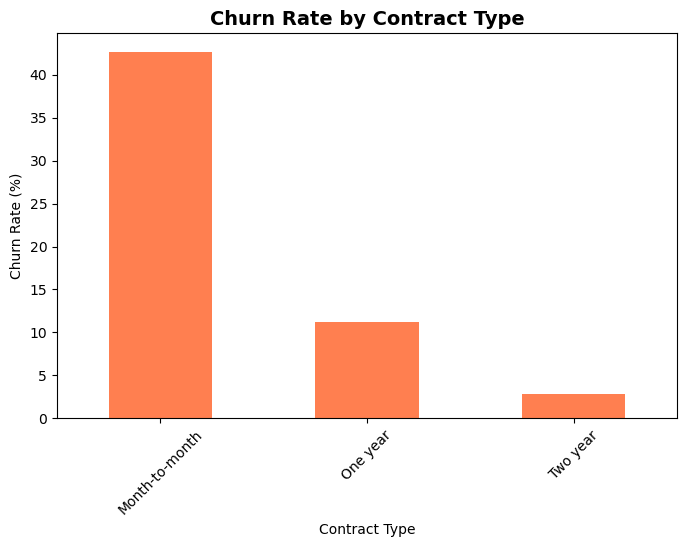

In [35]:
# Churn by Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

print("Churn Rate by Contract Type:")
print(contract_churn)

# Visualize
contract_churn['Yes'].plot(kind='bar', color='coral', figsize=(8,5))
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Key Finding 1: Contract Type
# Recommendations:
# - Encourage customers with month-to-month contracts to switch to longer-term contracts.

Average Monthly Charges:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64


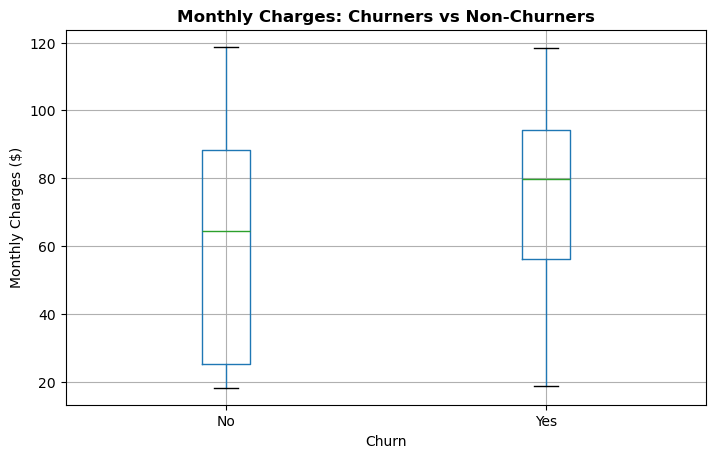

In [36]:
# Compare MonthlyCharges for churners vs non-churners
print("Average Monthly Charges:")
print(df.groupby('Churn')['MonthlyCharges'].mean())

# Visualize
df.boxplot(column='MonthlyCharges', by='Churn', figsize=(8,5))
plt.suptitle('')
plt.title('Monthly Charges: Churners vs Non-Churners', fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

In [37]:
# Do month-to-month customers also pay more?
print("Average Monthly Charges by Contract Type:")
print(df.groupby('Contract')['MonthlyCharges'].mean().sort_values(ascending=False))

Average Monthly Charges by Contract Type:
Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


# Key Finding 2: Monthly Charges
# 1. Overall churn rate: 26.54% (High)
# 2. Month-to-month contracts: 42.7% churn rate
# 3. Churners pay $74/month vs $61 for loyal customers
# 4. Month-to-month customers pay the MOST but get the LEAST commitment benefit
#
# Recommendations:
# Offer discounted rates for customers who switch from 
# month-to-month to 1-year or 2-year contracts. This could reduce 
# churn significantly while increasing customer lifetime value.

Average Tenure (months):
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


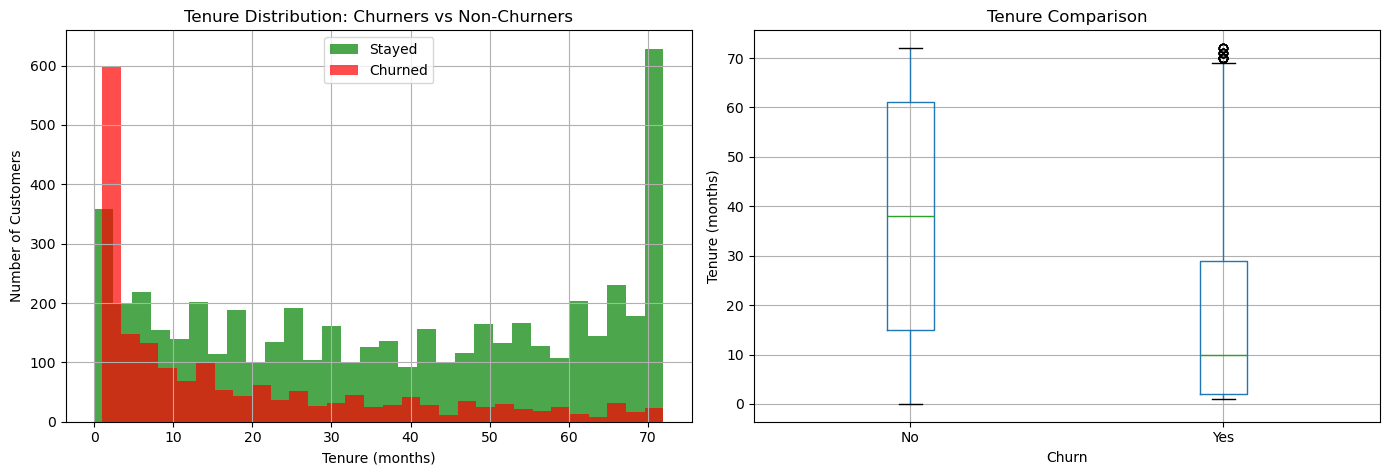

In [38]:
# Compare tenure for churners vs non-churners
print("Average Tenure (months):")
print(df.groupby('Churn')['tenure'].mean())

# Visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df[df['Churn'] == 'No']['tenure'].hist(bins=30, alpha=0.7, label='Stayed', ax=ax[0], color='green')
df[df['Churn'] == 'Yes']['tenure'].hist(bins=30, alpha=0.7, label='Churned', ax=ax[0], color='red')
ax[0].set_xlabel('Tenure (months)')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Tenure Distribution: Churners vs Non-Churners')
ax[0].legend()

# Box plot
df.boxplot(column='tenure', by='Churn', ax=ax[1])
ax[1].set_title('Tenure Comparison')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Tenure (months)')

plt.suptitle('')
plt.tight_layout()
plt.show()

# Key Finding #3: Tenure
# - Loyal customers: ~38 months average tenure
# - Churners: ~18 months average tenure
# - Most churn happens in the first few months
#
# Recommendations:
# Implement a "First 90 Days" new customer program:
# - Proactive check-ins at 1, 3, and 6 months
# - Early contract upgrade incentives
# - Dedicated support for new customers


Churn Rate by Internet Service Type:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980




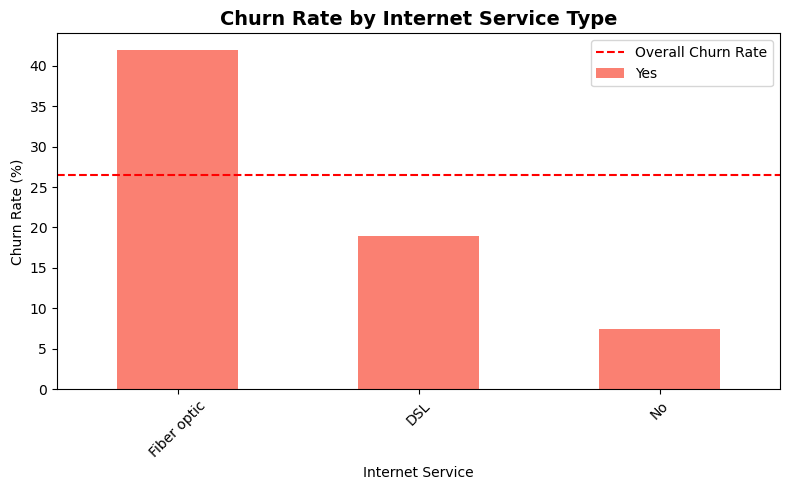

In [39]:
# Churn rate by Internet Service type
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

print("Churn Rate by Internet Service Type:")
print(internet_churn)
print("\n")

# Visualize
internet_churn['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon', figsize=(8,5))
plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.axhline(y=26.54, color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# Do Fiber optic customers actually pay more?
print("Average Monthly Charges by Internet Service:")
print(df.groupby('InternetService')['MonthlyCharges'].mean().sort_values(ascending=False))

Average Monthly Charges by Internet Service:
InternetService
Fiber optic    91.500129
DSL            58.102169
No             21.079194
Name: MonthlyCharges, dtype: float64


# Key Finding #4: Internet Service
# ============================================
# - Fiber optic: 41.9% churn, $91/month (CRITICAL ISSUE)
# - DSL: 19% churn, $58/month
# - No internet: 7.4% churn, $21/month
#
# Recommendations:
# Launch "Fiber Loyalty Bundle" - Offer 15-20% discount on fiber 
# optic for customers who commit to 1-year+ contracts.
# Projected impact: Reduce fiber churn from 42% to ~25%